In [5]:
%matplotlib inline
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from collections import OrderedDict

cuisine = []
recipe = []

with open('train.json') as f:
	data = json.load(f)
	for i in data:
		cuisine.append(i['cuisine'])
		recipe.append(i['ingredients'])
     
train = pd.DataFrame({'Cuisine': cuisine, 'Recipe':recipe})

cuisine=  ['thai','vietnamese', 'japanese', 'korean', 'chinese', 
            'british','irish','french','russian',
            'spanish','moroccan','greek','italian','filipino',
            'jamaican','indian',
             'mexican','brazilian',
             'cajun_creole','southern_us']

country = pd.get_dummies(train['Cuisine'])
train = train.join(country)
train

,Cuisine,Recipe,brazilian,british,cajun_creole,chinese,filipino,french,greek,indian,...,jamaican,japanese,korean,mexican,moroccan,russian,southern_us,spanish,thai,vietnamese
0,greek,"[romaine lettuce, black olives, grape tomatoes...",0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,indian,"[water, vegetable oil, wheat, salt]",0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,indian,"[black pepper, shallots, cornflour, cayenne pe...",0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,jamaican,"[plain flour, sugar, butter, eggs, fresh ginge...",0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,spanish,"[olive oil, salt, medium shrimp, pepper, garli...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,italian,"[sugar, pistachio nuts, white almond bark, flo...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,mexican,"[olive oil, purple onion, fresh pineapple, por...",0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9,italian,"[chopped tomatoes, fresh basil, garlic, extra-...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We will also need a list of unique ingredients. Since there is a lot of them, I will only extract the top 40 of them

In [2]:
uniqueIng = []

for stuff in recipe:
    uniqueIng+= stuff

ing_with_count = np.unique(uniqueIng, return_counts=True)

uniqueIng = [x for (y,x) in reversed(sorted(zip(ing_with_count[1], ing_with_count[0])))][:40]
uniqueIng

[u'salt',
 u'onions',
 u'olive oil',
 u'water',
 u'garlic',
 u'sugar',
 u'garlic cloves',
 u'butter',
 u'ground black pepper',
 u'all-purpose flour',
 u'pepper',
 u'vegetable oil',
 u'eggs',
 u'soy sauce',
 u'kosher salt',
 u'green onions',
 u'tomatoes',
 u'large eggs',
 u'carrots',
 u'unsalted butter',
 u'ground cumin',
 u'extra-virgin olive oil',
 u'black pepper',
 u'milk',
 u'chili powder',
 u'oil',
 u'red bell pepper',
 u'purple onion',
 u'scallions',
 u'grated parmesan cheese',
 u'sesame oil',
 u'corn starch',
 u'ginger',
 u'baking powder',
 u'jalapeno chilies',
 u'dried oregano',
 u'chopped cilantro fresh',
 u'fresh lemon juice',
 u'diced tomatoes',
 u'fresh parsley']

Now let's see where these ingredients are most frequently used


In [16]:
Cuisine_ingre_count=OrderedDict()
for ing in uniqueIng:
    indexList=[]
    for (i,j) in enumerate(train['Recipe']):
        if ing in j:
            indexList.append(i)
        else:
            continue
    count_per_country = train[index = indexList]['Cuisine'].value_counts()
    Cuisine_ingre_count[ing]=count_per_country
Cuisine_ingre_count

SyntaxError: invalid syntax (<ipython-input-16-1593c169ec98>, line 9)

We will extract the most commonly used ingredients per cuisine

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

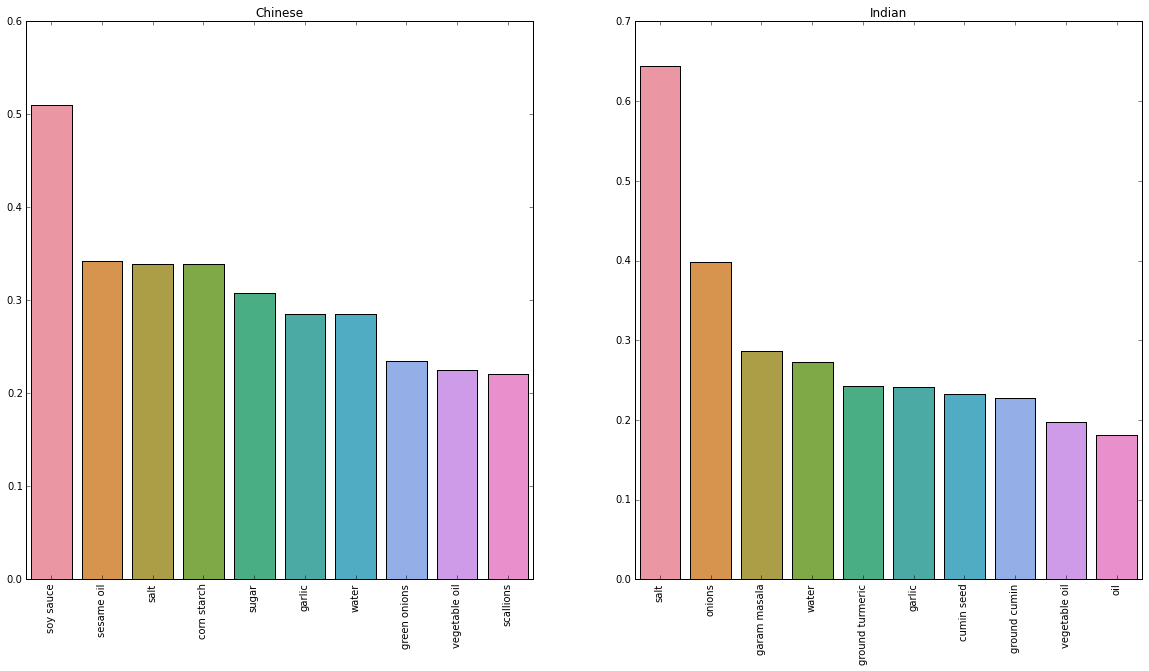

In [19]:
#Returns the top n occurance and probability for each ingredient existing in the type of cuisine
def cuisine_ingredients(cuisine_type, top_num=10):
    dish = train[train['Cuisine']==cuisine_type]['Recipe']
    combined = np.unique(reduce(lambda x,y: x+y, dish), return_counts=True)
    top_count = [x for (y,x) in reversed(sorted(zip(combined[1], combined[0])))]
    
    total_num = train[train['Cuisine']==cuisine_type]['Recipe'].shape[0]
    percentage = list(reversed(sorted(combined[1].astype('float64')/float(total_num))))
    
    return top_count[:top_num], percentage[:top_num]

fig = plt.figure(figsize = (20,10))

chinese = cuisine_ingredients('chinese')
indian = cuisine_ingredients('indian')

fig.add_subplot(121, title='Chinese')
sns.barplot(chinese[0],chinese[1])
plt.xticks(rotation = 90)

fig.add_subplot(122, title='Indian')
sns.barplot(indian[0],indian[1])
plt.xticks(rotation=90)


In [36]:
candidates= []
for country in cuisine:
    counIng = cuisine_ingredients(country)
    for i, ing in enumerate(counIng[0]):
        if ing not in candidates:
            candidates.append((ing, counIng[1][i]))
    
candidates

# matplotlib.rcParams.update({'font.size': 20})

# fig = plt.figure(figsize=(30,30))
# rainbow = cm.rainbow(np.linspace(0,1,len(cuisine)))
# for country, c in zip(cuisine,rainbow):
#     cplot = cuisine_ingredients(country)
#     nameIndex = [uniqueIng.index(stuff) for stuff in cplot[0]]
#     plt.scatter(nameIndex,cplot[1], s= 400,label=country, color= c)
# plt.xlim(0,400)
# plt.legend()
# plt.show()

[(u'fish sauce', 0.4061078622482131),
 (u'garlic', 0.26900584795321636),
 (u'salt', 0.25730994152046782),
 (u'coconut milk', 0.22936972059779076),
 (u'vegetable oil', 0.21767381416504222),
 (u'soy sauce', 0.2157244964262508),
 (u'sugar', 0.21442495126705652),
 (u'water', 0.2014294996751137),
 (u'garlic cloves', 0.19428200129954515),
 (u'fresh lime juice', 0.17738791423001948),
 (u'fish sauce', 0.47515151515151516),
 (u'sugar', 0.41696969696969699),
 (u'salt', 0.32000000000000001),
 (u'garlic', 0.28969696969696968),
 (u'water', 0.27515151515151515),
 (u'carrots', 0.23757575757575758),
 (u'soy sauce', 0.18787878787878787),
 (u'shallots', 0.18303030303030304),
 (u'garlic cloves', 0.17939393939393938),
 (u'vegetable oil', 0.17575757575757575),
 (u'soy sauce', 0.39423752635277581),
 (u'salt', 0.29655657062543922),
 (u'mirin', 0.28250175685172174),
 (u'sugar', 0.28179901616303582),
 (u'water', 0.26914968376669007),
 (u'sake', 0.20309205903021785),
 (u'rice vinegar', 0.18341531974701336),
 (u

We wish to draw correlations of each ingredients with the available cuisines. But before we move on, there are some preprocessing that we need to do to strengthen our statistics. First we will one-hot these ingredients into the dataframe.

In [21]:
def hasIngre(row, ingre):
    if ingre in row['Recipe']:
        return 1
    else:
        return 0

for i, ingre in enumerate(candidates):
    train[ingre] = train.apply(lambda x: hasIngre(x, ingre), axis=1)
    
train = train.drop(['Cuisine','Recipe'], axis=1)

Second, notice in our dataset, the same ingredient can actually appear to have different names. To rememdy this, we will manually pick out these elements and include that in out candidate list.

In [ ]:
candidates = [ 
    ['fish sauce', 'asian fish sauce', 'Thai fish sauce', 'vietnamnese fish sauce'],
    ['garlic','garlic cloves','minced garlic','large garlic cloves','garlic paste','crushed garlic'],
    'salt',
    'sugar',
    'water',
    ]

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
         18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,
         27.5,  28.5,  29.5,  30.5,  31.5,  32.5,  33.5,  34.5,  35.5,
         36.5,  37.5,  38.5,  39.5,  40.5,  41.5,  42.5,  43.5,  44.5,
         45.5,  46.5,  47.5,  48.5,  49.5,  50.5,  51.5,  52.5,  53.5,
         54.5,  55.5,  56.5,  57.5,  58.5,  59.5,  60.5,  61.5,  62.5,
         63.5,  64.5,  65.5,  66.5,  67.5,  68.5,  69.5,  70.5,  71.5,
         72.5,  73.5,  74.5,  75.5,  76.5,  77.5,  78.5,  79.5,  80.5,
         81.5,  82.5]), <a list of 83 Text yticklabel objects>)

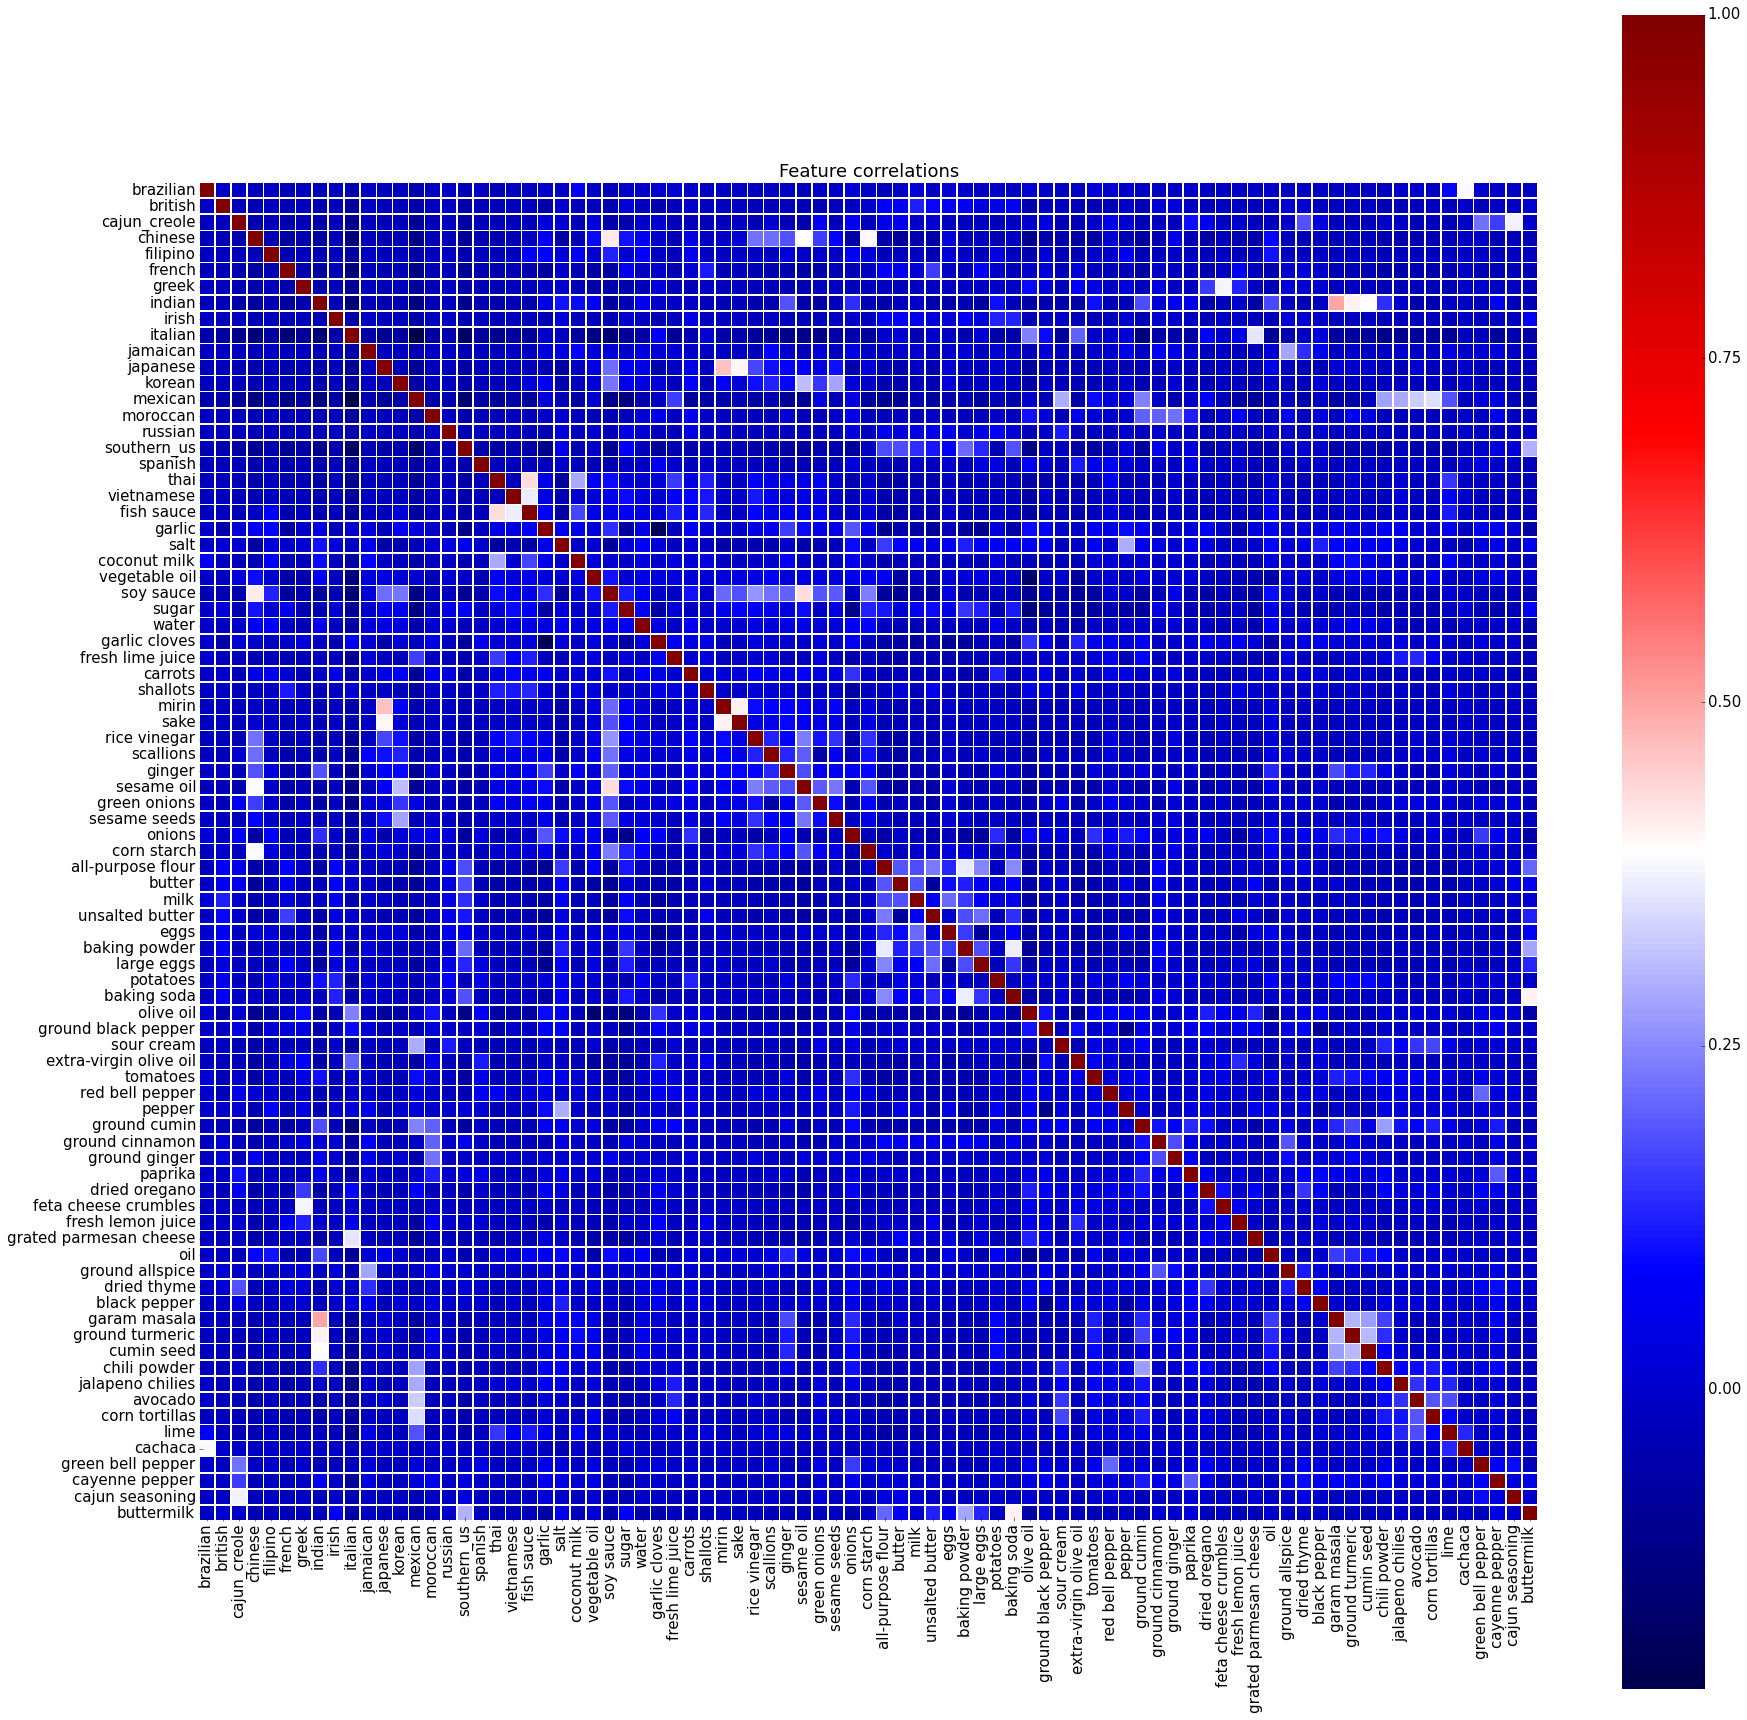

In [29]:
matplotlib.rcParams.update({'font.size': 15})
colormap = plt.cm.seismic
plt.figure(figsize=(30,30))
plt.title('Feature correlations')
sns.heatmap(train.corr(), linewidths = 0.1, vmax=1.0, cmap=colormap, square=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0)